<a href="https://colab.research.google.com/github/anandaalexx/Deteksi-Kematangan/blob/main/Kelompok10_RuangWarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Mengunduh Gambar

In [ ]:
def download_image(url):
    response = requests.get(url)
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        image = np.array(image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        return image
    else:
        print("Gagal mengunduh gambar")
        return None

# Mendeteksi Kematangan

In [ ]:
def ripeness_detection(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Hijau (HSV)
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])

    # Merah 1 (HSV)
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])

    # Merah 2 (HSV)
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # Masking gambar
    mask_green = cv2.inRange(img_hsv, lower_green, upper_green)
    mask_red1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
    mask_red = mask_red1 + mask_red2

    # Hitung jumlah piksel hijau dan merah
    green_pixels = np.sum(mask_green > 0)
    red_pixels = np.sum(mask_red > 0)

    # Tentukan status kematangan
    ripeness = "Sudah Matang" if red_pixels > green_pixels else "Belum Matang"

    # Buat gambar deteksi hijau dan merah
    green_detected = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_green)
    red_detected = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)

    # Tampilkan hasil
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img_rgb)
    axes[0].set_title("Gambar Asli")
    axes[0].axis("off")

    axes[1].imshow(green_detected)
    axes[1].set_title("Deteksi Hijau")
    axes[1].axis("off")

    axes[2].imshow(red_detected)
    axes[2].set_title("Deteksi Merah")
    axes[2].axis("off")

    plt.suptitle(f"Status kematangan tomat: {ripeness}", fontsize=16, fontweight="bold")
    plt.show()

# Deteksi jika Tomat Hijau

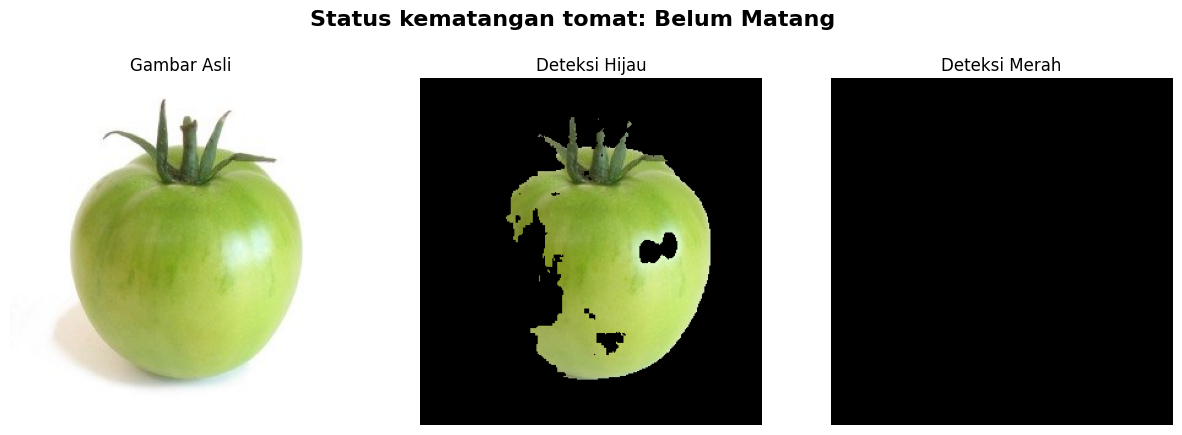

In [ ]:
from PIL import Image
image_url = "https://i0.wp.com/resepkoki.id/wp-content/uploads/2018/11/tomat-hijau.jpg"
image = download_image(image_url)
if image is not None:
  ripeness_detection(image)

# Deteksi jika Tomat Merah

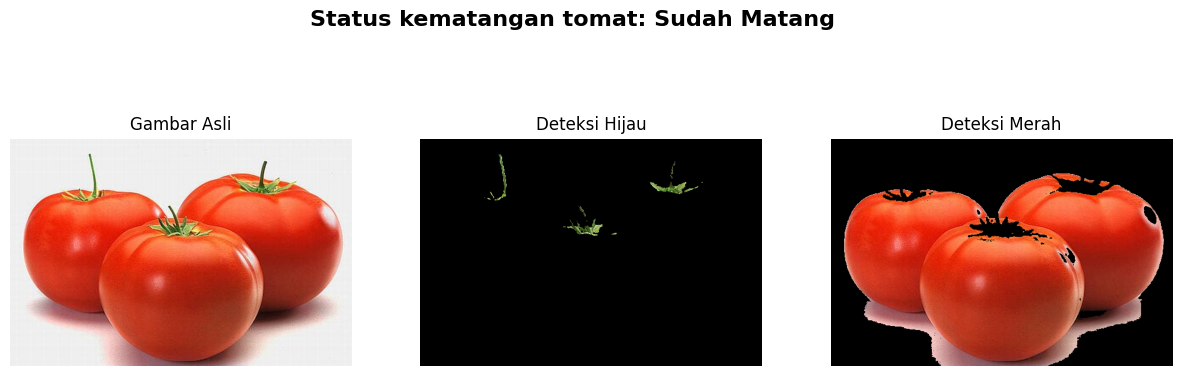

In [ ]:
from PIL import Image
image_url = "https://i0.wp.com/resepkoki.id/wp-content/uploads/2018/11/tomat-apel.jpg"
image = download_image(image_url)
if image is not None:
  ripeness_detection(image)